<a href="https://colab.research.google.com/github/rrl7012005/Deep-Learning-PyTorch/blob/main/Tensor_and_PyTorch_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

Get the version

In [ ]:
torch.__version__

'2.4.0+cu121'

#Tensors

Lets create a scalar tensor, 0 dimensional tensor

In [ ]:
scalar = torch.tensor(7) #Notice the lowercase t
scalar

tensor(7)

To check a dimension of a tensor. Use the .ndim attribute

In [ ]:
scalar.ndim

0

If we just wanted the number from the tensor, use .item() method for 0 D tensors

In [ ]:
scalar.item()

7

**Vector Tensor**

So bracket and then array. Here the dimensions refers to the rank of the tensor not of the vector. If you want the actual dimensions, use .shape attribute

In [ ]:
vector = torch.tensor([7, 7])
vector, vector.ndim

(tensor([7, 7]), 1)

In [ ]:
vector.shape #returns tensor

torch.Size([2])

**Matrix**

In [ ]:
Matrix = torch.tensor([[7, 8],
                       [2, 5]])

Matrix, Matrix.ndim, Matrix.shape

(tensor([[7, 8],
         [2, 5]]),
 2,
 torch.Size([2, 2]))

Remember shapes are given from outer dimension to inner dimension, with lowercase letters representing scalars and vectors and matrices and higher with capital letters.

**Random Tensors**

torch.rand draws from a uniform distribution 0 to 1. Pass the shape as the argument.

Also .dtype is an attribute of all tensors

In [ ]:
random = torch.rand(size=(3,4))
random, random.dtype

(tensor([[0.3829, 0.9593, 0.3904, 0.6009],
         [0.2566, 0.7936, 0.9408, 0.1332],
         [0.9346, 0.5936, 0.8694, 0.5677]]),
 torch.float32)

**Filling tensors**

Fill with zeros using torch.zeros, pass the size. Same with torch.ones

ones_like, zeros_like pass the tensor into the input argument

In [ ]:
zeros = torch.zeros((3, 4))
ones = torch.ones((2, 5))

ones, zeros

(tensor([[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]))

Can create tensors covering a range of values, using arange.

In [ ]:
x = torch.arange(start=0, end=10, step=2)
x

tensor([0, 2, 4, 6, 8])

**Data types**

Some data types are specific for CPU, some are better for GPU. Generally if you see torch.cuda anywhere, the tensor is being used for GPU.

The default is torch.float32 aka torch.float

torch.float64 aka torch.double
torch.float16 aka torch.half

Whenever you create a tensor you can specify which device you put it on. If dont specify it will default

Can also determine dtypes when creating a tensor

In [ ]:
x = torch.ones_like(ones, dtype = torch.float64)
x = torch.zeros_like(ones, dtype = torch.float64)
x.shape, x.dtype

(torch.Size([2, 5]), torch.float64)

The requires grad determines whether pytorch will track gradients on the computer (see below).

In [ ]:
tensor = torch.tensor([3.0, 6.0, 9.0], dtype=None, device=None, requires_grad=False)

tensor.device #Default device is usually cpu

device(type='cpu')

##Tensor Operations

Element wise addition and multiplication like numpy

In [ ]:
tensor = torch.tensor([1, 2, 3])
tensor + 10, tensor * 10 #note tensor wont change unless reassigned

(tensor([11, 12, 13]), tensor([10, 20, 30]))

PyTorch also has built in functions for element wise operations

In [ ]:
torch.mul(tensor, 10), torch.add(tensor, 10)

(tensor([10, 20, 30]), tensor([11, 12, 13]))

If you have 2 tensors of the same shape. it will still do element wise addition/multiplication

In [ ]:
tensor * tensor, tensor + tensor

(tensor([1, 4, 9]), tensor([2, 4, 6]))

For matrix multiplication use matmul or @ or mm for short. For 1D tensors, they will interpret matmul as a dot product.

In [ ]:
tensor @ tensor

tensor(14)

torch.transpose works in 2 ways. Either you can take a tensor object and apply a tranpose method or apply tranpose function (specifying the 2 dimensions to swap)

In [ ]:
tensor_A = torch.rand(3, 2)
tensor_B = torch.rand(3, 2)

print(torch.mm(tensor_A, tensor_B.T))

torch.transpose(tensor_B, -2, -1)

t = torch.rand(4, 3, 1, 2, 1, 3)
t.T.shape #this swaps all the dimensions

tensor([[0.3893, 0.5772, 0.1938],
        [0.4920, 0.7402, 0.2479],
        [0.3488, 0.6010, 0.1972]])


torch.Size([3, 1, 2, 1, 3, 4])

##Aggregation

Aggregating essentially goes from more values to less values

To find minima, maximima, mean, sum of a tensor. Just do: Now for some methods like mean, data has to be in float32 or some other specific data type

So first cast the tensor.

In [ ]:
x = torch.arange(0, 100, 10)
x = x.type(torch.float32)
x.min(), x.max(), x.mean(), x.sum()

(tensor(0.), tensor(90.), tensor(45.), tensor(450.))

In [ ]:
#Can also do like this

torch.max(x), torch.min(x), torch.mean(x), torch.sum(x)

(tensor(90.), tensor(0.), tensor(45.), tensor(450.))

Can find the argument of the max or min value

In [ ]:
tensor = torch.rand((4, 3))
tensor, tensor.argmin(), tensor.argmax() #if multiple D it first stretches the tensors into 1D going from inner to outer dimension

(tensor([[0.3227, 0.0162, 0.2137],
         [0.6249, 0.4340, 0.1371],
         [0.5117, 0.1585, 0.0758],
         [0.2247, 0.0624, 0.1816]]),
 tensor(1),
 tensor(3))

Can also torch. methods for that. For any method applied to a tensor you can also do torch.

**Reshaping**

Add extra dimension with torch.reshape. has to be compatible ofcourse.

In [ ]:
x = torch.arange(1, 8)
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[1, 2, 3, 4, 5, 6, 7]]), torch.Size([1, 7]))

Can also do similar thing with torch.view. But torch.view creates a new view of the same tensor so if we change the view we also change the original tensor.

In [ ]:
z = x.view(1, 7)
z

tensor([[1, 2, 3, 4, 5, 6, 7]])

In [ ]:
z[:, 0] = 5
z, x #x changed as well

(tensor([[5, 2, 3, 4, 5, 6, 7]]), tensor([5, 2, 3, 4, 5, 6, 7]))

So be careful.

If we want to stack tensors along a specific dimension

In [ ]:
x_stacked = torch.stack([x, x, x, x], dim=0)
x_stacked

tensor([[5, 2, 3, 4, 5, 6, 7],
        [5, 2, 3, 4, 5, 6, 7],
        [5, 2, 3, 4, 5, 6, 7],
        [5, 2, 3, 4, 5, 6, 7]])

In [ ]:
x_stacked = torch.stack([x, x, x, x], dim=1)
x_stacked

tensor([[5, 5, 5, 5],
        [2, 2, 2, 2],
        [3, 3, 3, 3],
        [4, 4, 4, 4],
        [5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7]])

Squeezing tensors. Oh btw u can also pass negative numbers in the dim argument.

Squeezing removes all instances of dimension 1.

In [ ]:
x = torch.rand(3, 3, 1, 2, 4, 2, 1)
x.shape, x.squeeze().shape

(torch.Size([3, 3, 1, 2, 4, 2, 1]), torch.Size([3, 3, 2, 4, 2]))

You can also add dimensions along a specified axis by using unsqueeze.

In [ ]:
x.squeeze().unsqueeze(dim=0).shape #dim 0 is first entry

torch.Size([1, 3, 3, 2, 4, 2])

You can also rearrange the order of axes values with torch.permute method

for example (2, 0, 1) means 0 --> 1, 2--> 0 and 1 --> 2

In [ ]:
x_original = torch.rand((4, 3))
x_permuted = x_original.permute(1, 0)
x_original.shape, x_permuted.shape

(torch.Size([4, 3]), torch.Size([3, 4]))

Note: permuting returns a view so changing it will change the original.

**Indexing**

Select data same way as traditional python

In [ ]:
x = torch.arange(1, 10).reshape(1, 3, 3)
print(x, x[0], x[0][0], x[0][0][0])
print(x[:, 0], x[:, :, 0])

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]]) tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]) tensor([1, 2, 3]) tensor(1)
tensor([[1, 2, 3]]) tensor([[1, 4, 7]])


**Converting to/from numpy**

To convert from numpy array, do torch.from_numpy

to go from tensor to numpy to x.numpy()

In [ ]:
import numpy as np
array = np.arange(1, 80)
tensor = torch.from_numpy(array)
array, tensor

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
 tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
         19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
         37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
         55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
         73, 74, 75, 76, 77, 78, 79]))

If we change tensor we dont need to worry about array changing.

In [ ]:
np_array = tensor.numpy()
np_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])

**Other stuff**

Checking if tensors are equal element wise

In [ ]:
A = torch.rand(3, 3)
B = torch.rand(3, 3)
A == B

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

Fixing randomness

In [ ]:
torch.manual_seed(seed=42)

x = torch.rand(3, 4)
z = torch.rand((3, 4))

torch.manual_seed(seed=42) #Have to do it for each random operation

y = torch.rand(3, 4)

x == y, y == z

(tensor([[True, True, True, True],
         [True, True, True, True],
         [True, True, True, True]]),
 tensor([[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False]]))

##GPU

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
#Count the number of GPUs

torch.cuda.device_count()

1

Now we need to put tensors and models on gpu. What we do is we call .to(device)

In [ ]:
tensor = torch.tensor([1, 2, 3])

print(tensor, tensor.device)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu #The index after cuda tells u which GPU its stored on.

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

To move tensor back on CPU, which we need it to do if we want to interact with tensors with numpy. Numpy does not use the GPU.

In [ ]:
#tensor_on_gpu.numpy() This will give error

tensor_back_on_cpu = tensor_on_gpu.cpu().numpy() #We did .cpu
tensor_back_on_cpu

#The original copy is still on the GPU

array([1, 2, 3])

#PyTorch Modelling Fundamentals

In [ ]:
from torch import nn
import matplotlib.pyplot as plt

##Data Preparation

Lets create a linear regression dataset which we'll train with pytorch.

In [ ]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1) #make 2D so easier to do matmul
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

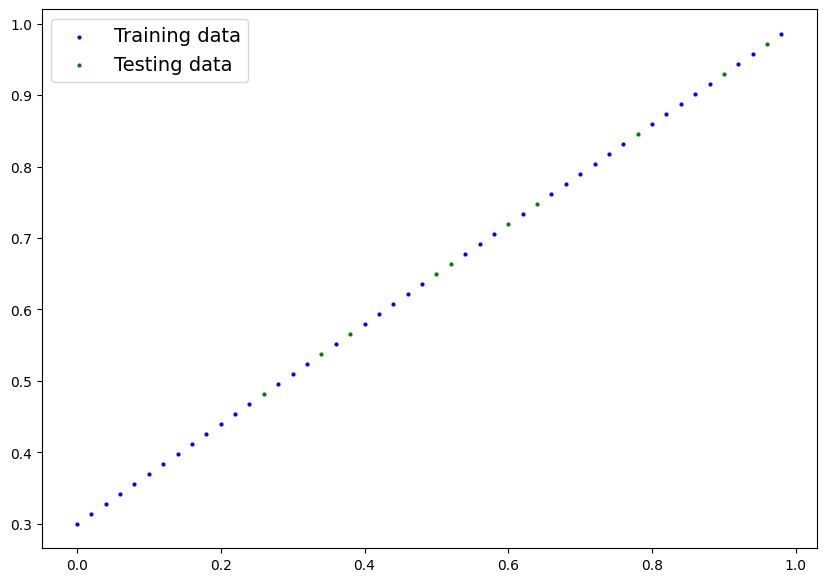

In [ ]:
#Visualize the data

def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

plot_predictions()

##Model Building and Training

PyTorch has 4 essential modules to make any kind of neural network (torch.nn, torch.optim, torch.utils.data.Dataset, torch.utils.data.DataLoader)

torch.nn contains all the building blocks for computational graphs

torch.nn.Module is the base class for all neural network modules, all building blocks for neural networks are subclasses. Whenever we build a neural network we should subclass nn.Module. Everything from pytorch inherits from this. This also requires a forward method to be implemented, to define the computation that will take place on the data passed to the particular nn.Module

torch.nn.Parameter contains the smaller parameters like weights and biases. It is used to store tensors that can be used with nn.Module. If requires_grad is set to True, gradients are calculated automatically (known as autograd), improves optimization. It is a type of tensor that is considered a module parameter. For smaller models we intialize just parameters, but for larger models we can initialize whole layers like the nn.Linear

torch.optim contains various optimization algorithms telling models how to improve gradient descent.


randn draws from a standard normal distribution. First argument is shape

In [ ]:
class LinearRegressionModule(nn.Module):
    def __init__(self):
      super().__init__() #inherits the class
      self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
      self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor: #x is of type torch tensor and returns torch tensor
      return self.weights * x + self.bias

In [ ]:
torch.manual_seed(42)

model = LinearRegressionModule()
list(model.parameters()) #returns the parameters of the model

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

We can also get the state of the model, essentially listing the names of our parameters.

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

**torch.inference_mode()**

This can be used for inference. When we pass data to our model, itll go through the forward method and produce a result.

We will use the torch.inference_mode as a context manager, as that is what it is. We do this specifically to turn off gradient tracking to make forward-passes faster (more optimal).

In older pytorch code, you'll see torch.no_grad() which is similar but torch.inference_mode() is newer and preferred

In [ ]:
with torch.inference_mode():
  y_preds = model(X_test) #Does the forward method automatically

#In older code
#with torch.no_grad():
#   y_preds = model(X_test)

#Or define a function and use these as a decorator.
y_preds, y_test

(tensor([[0.2163],
         [0.3914],
         [0.3308],
         [0.4318],
         [0.2433],
         [0.4520],
         [0.3039],
         [0.2972],
         [0.3443],
         [0.2568]]),
 tensor([[0.4820],
         [0.8460],
         [0.7200],
         [0.9300],
         [0.5380],
         [0.9720],
         [0.6640],
         [0.6500],
         [0.7480],
         [0.5660]]))

Obviously predictions is poor as theres no training

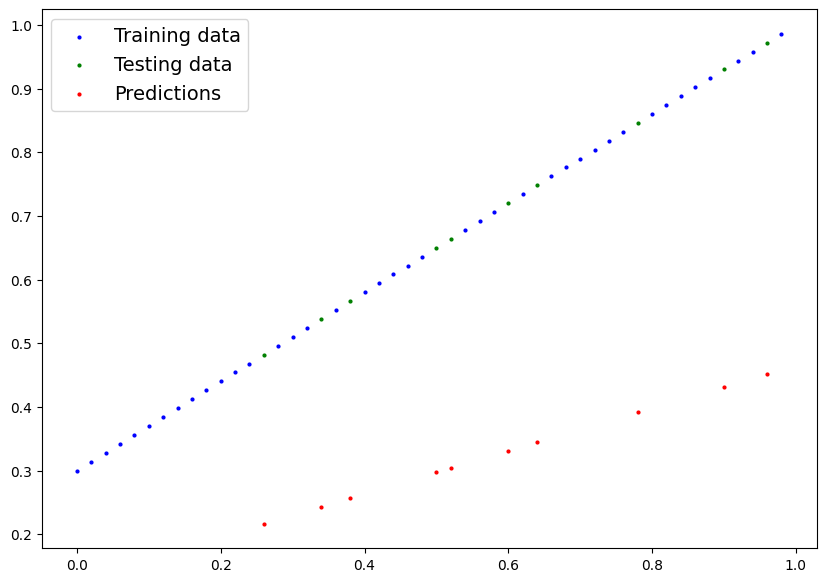

In [ ]:
plot_predictions(predictions = y_preds)

Create a loss and optimizer

Mean absolute error is known as torch.nn.L1Loss()

Lets use SGD optimizer. It takes arguments params and lr

In [ ]:
loss_fn = nn.L1Loss() #Declare the loss function
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)

epochs = 100

train_loss = []
test_loss = []
epoch_count = []

for epoch in range(epochs):
  #Place the model in training mode

  model.train()

  y_pred = model(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad() #Need to zero the gradients as they accumulate every epoch

  loss.backward()

  optimizer.step() #Update the optimizer

  #Testing
  model.eval() #Turn off gradient tracking, place in eval mode

  with torch.inference_mode():
    test_pred = model(X_test)
    loss_test = loss_fn(test_pred, y_test.type(torch.float))

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss.append(loss.detach().numpy()) #.detach creates new tensor but wont track gradients
    test_loss.append(loss_test.detach().numpy())
    print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {loss_test}")

Epoch: 0 | MAE Train Loss: 0.340311199426651 | MAE Test Loss: 0.3720795214176178
Epoch: 10 | MAE Train Loss: 0.21864214539527893 | MAE Test Loss: 0.24470801651477814
Epoch: 20 | MAE Train Loss: 0.10375527292490005 | MAE Test Loss: 0.12293665111064911
Epoch: 30 | MAE Train Loss: 0.06399796903133392 | MAE Test Loss: 0.06073009967803955
Epoch: 40 | MAE Train Loss: 0.05161098390817642 | MAE Test Loss: 0.04132990166544914
Epoch: 50 | MAE Train Loss: 0.04540504142642021 | MAE Test Loss: 0.03398849442601204
Epoch: 60 | MAE Train Loss: 0.03980403393507004 | MAE Test Loss: 0.029580067843198776
Epoch: 70 | MAE Train Loss: 0.034203048795461655 | MAE Test Loss: 0.02517164871096611
Epoch: 80 | MAE Train Loss: 0.028602052479982376 | MAE Test Loss: 0.020763223990797997
Epoch: 90 | MAE Train Loss: 0.02300105430185795 | MAE Test Loss: 0.016354799270629883


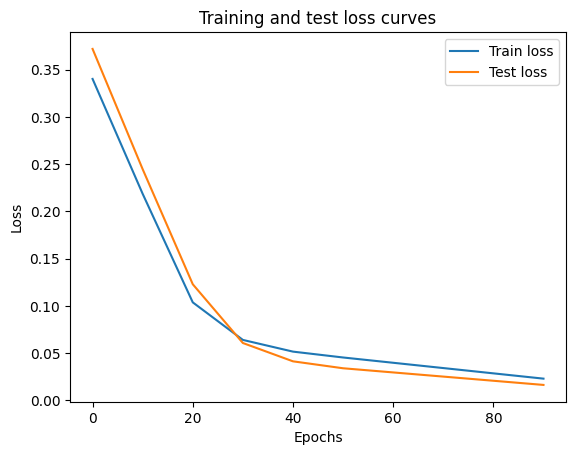

In [ ]:
plt.plot(epoch_count, train_loss, label="Train loss")
plt.plot(epoch_count, test_loss, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
print(model.state_dict())
print(f"weights: {weight}, bias: {bias}")

OrderedDict([('weights', tensor([0.6344])), ('bias', tensor([0.3333]))])
weights: 0.7, bias: 0.3


All predictions should be made with objects on the same device e.g. data and model on GPU only or data and model on CPU only.

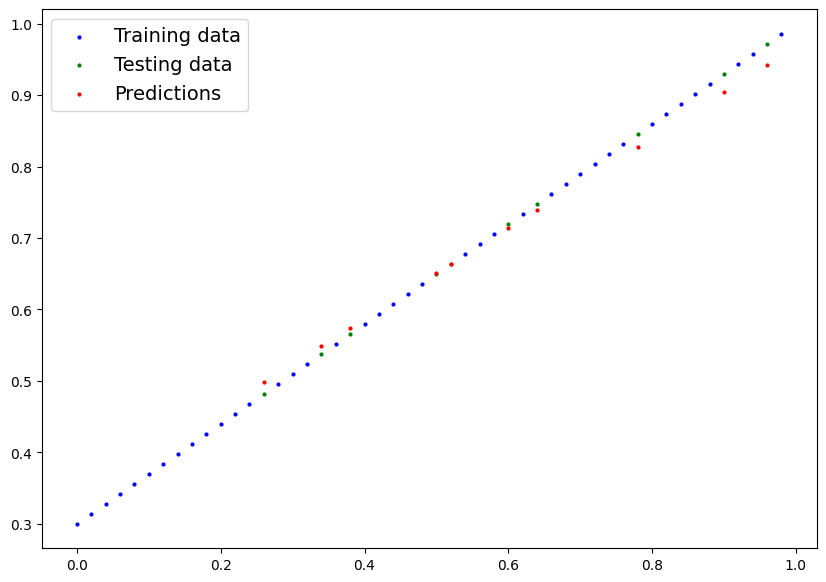

In [ ]:
model.eval()

with torch.inference_mode():
  y_preds_new = model(X_test)

plot_predictions(predictions=y_preds_new)

##Saving and loading a model

The best way to store a model is to store state_dict

In [ ]:
from pathlib import Path #Create a directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#This only saves the learnt parameters

torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

Now to load we call torch.load inside torch.module.load_state_dict as we only saved state_dict the dictionary of learnt parameters, not the entire model. So we have to create instance of class still.

In [ ]:
loaded_model = LinearRegressionModule()

loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)

y_preds_new == loaded_model_preds

<ipython-input-204-c3206967d662>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

Now put it all together but allow GPU

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

Using device: cuda


(40, 40, 10, 10)

Now instead of defining the weights and biases of our model manually, we will use nn.Linear to do it for us, which is a layer.

It takes 2 arguments, in_features is input dimension and out_feature is output dimension

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features=1, out_features=1)

  def forward(self, x):
    return self.linear(x)

torch.manual_seed(42)

model_1 = Model()

model_1.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]])),
             ('linear.bias', tensor([0.8300]))])

Lets check the models current device

In [ ]:
next(model_1.parameters()).device #Check parameters

device(type='cpu')

Send to GPU

In [ ]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

Put the data on the device

In [ ]:
epochs = 1000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882


In [ ]:
print(model_1.state_dict())

OrderedDict([('linear.weight', tensor([[0.6968]], device='cuda:0')), ('linear.bias', tensor([0.3025], device='cuda:0'))])


In [ ]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

To plot the data you have to first create a copy on the cpu by calling .cpu

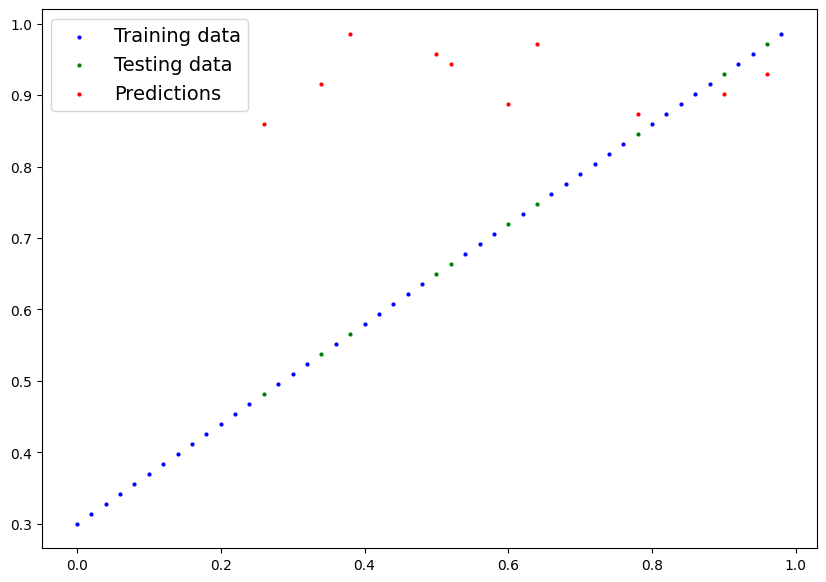

In [ ]:
plot_predictions(predictions=y_preds.cpu())